In [154]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy.stats
import random
%matplotlib inline

In [104]:
declarations_df = pd.read_csv('data/declarations.csv')
declarations_df.head()

,person_id,person_name,year,office_id,office_name,income,savings,real_estate_amount,real_estate_squares
0,8,Зюганов Геннадий Андреевич,1998,14,Государственная Дума,124154.00,0.00,1,150.0
1,8,Зюганов Геннадий Андреевич,1999,449,Президент Российской Федерации,506247.00,0.00,3,252.7
2,8,Зюганов Геннадий Андреевич,2006,14,Государственная Дума,1257784.00,141740.91,1,167.4
3,8,Зюганов Геннадий Андреевич,2006,449,Президент Российской Федерации,3590668.48,400490.32,2,281.3
4,8,Зюганов Геннадий Андреевич,2009,14,Государственная Дума,2177821.52,0.00,3,448.7


In [105]:
df = pd.read_csv('data/graph.csv', header=None)
df.head()

,0,1,2
0,8,9,11
1,8,10,9
2,8,11,6
3,8,12,12
4,8,13,12


In [106]:
person_names = declarations_df[['person_id', 'person_name']].drop_duplicates().reset_index(drop=True)
person_names.index = person_names.person_id
person_names = person_names.drop(['person_id'], axis=1)
person_names.head()

,person_name
person_id,
8,Зюганов Геннадий Андреевич
9,Алферов Жорес Иванович
10,Андреев Андрей Анатольевич
11,Апарина Алевтина Викторовна
12,Афонин Юрий Вячеславович


In [107]:
graph = nx.Graph()
threshold = 5
for v1, v2, weight in df.values:
    if weight >= threshold:
        graph.add_edge(v1, v2, weight=weight)

In [108]:
graph = max(nx.connected_component_subgraphs(graph), key=len)
#nx.draw_networkx(graph)

In [109]:
graph.order(), graph.size()

(861, 106061)

In [110]:
officials_df = declarations_df[declarations_df.person_id.isin(graph.nodes)].groupby(['person_id'])['income', 'savings', 'real_estate_squares'].sum()
print(officials_df.shape)
officials_df.head()

(861, 3)


,income,savings,real_estate_squares
person_id,,,
8,6.021154e+07,8011838.49,5787.1
9,1.673203e+08,55473757.24,178933.7
10,3.254071e+07,15891.50,6634.8
11,1.261206e+07,531159.89,564.4
12,8.065601e+07,971003.72,28119.6


In [111]:
income = officials_df.income
savings = officials_df.savings
capital = officials_df.income + officials_df.savings
real_estate = officials_df.real_estate_squares


In [112]:
eigenvector_dict = nx.eigenvector_centrality_numpy(graph)
ec = np.array(list(eigenvector_dict.values()))
ec.shape

(861,)

In [113]:
print(scipy.stats.spearmanr(ec, income))
print(scipy.stats.spearmanr(ec, savings))
print(scipy.stats.spearmanr(ec, capital))
print(scipy.stats.spearmanr(ec, real_estate))

SpearmanrResult(correlation=0.12338636009401037, pvalue=0.0002843917872626124)
SpearmanrResult(correlation=0.6267638223946076, pvalue=3.69679611642289e-95)
SpearmanrResult(correlation=0.14558397985178417, pvalue=1.7988096342262084e-05)
SpearmanrResult(correlation=0.1727417089259688, pvalue=3.4010971717813905e-07)


In [114]:
print(scipy.stats.pearsonr(ec, income))
print(scipy.stats.pearsonr(ec, savings))
print(scipy.stats.pearsonr(ec, capital))
print(scipy.stats.pearsonr(ec, real_estate))

(0.059892024607357916, 0.07901610758947734)
(0.08383335589974619, 0.013867995572182974)
(0.06999558128824106, 0.040033644495616756)
(0.04663385196580203, 0.1715865179017522)


eigenvector_centrality
SpearmanrResult(correlation=0.12732434374791474, pvalue=0.00017976194829431538)
SpearmanrResult(correlation=0.6270362378592704, pvalue=2.9018733490780744e-95)
SpearmanrResult(correlation=0.148949281418038, pvalue=1.1400740157359816e-05)
SpearmanrResult(correlation=0.17837599885734298, pvalue=1.3735005272994655e-07)
degree_centrality
SpearmanrResult(correlation=0.12550757911091576, pvalue=0.00022249586666220523)
SpearmanrResult(correlation=0.5931850530177315, pvalue=5.888634999864847e-83)
SpearmanrResult(correlation=0.14626473125395154, pvalue=1.641616642488587e-05)
SpearmanrResult(correlation=0.18445628575919387, pvalue=4.996230258574285e-08)
pagerank_numpy
SpearmanrResult(correlation=0.08026875139332872, pvalue=0.018488324102099617)
SpearmanrResult(correlation=0.3640048790971667, pvalue=2.2767077730249446e-28)
SpearmanrResult(correlation=0.09487191892688415, pvalue=0.005335466030695903)
SpearmanrResult(correlation=0.11435358166307921, pvalue=0.000774887111641576

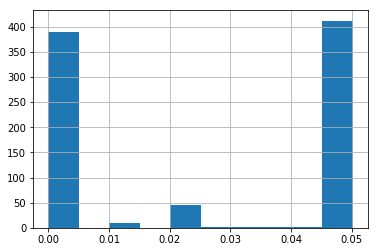

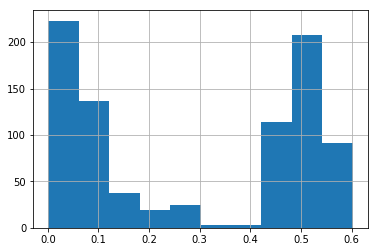

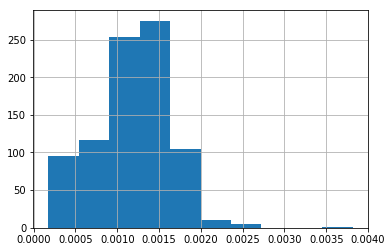

In [115]:
for centrality in [
    nx.eigenvector_centrality,
    nx.degree_centrality,
    nx.pagerank_numpy]:
    
    c_values = np.array(list(centrality(graph).values()))
    print(centrality.__name__)
    print(scipy.stats.spearmanr(c_values, income))
    print(scipy.stats.spearmanr(c_values, savings))
    print(scipy.stats.spearmanr(c_values, capital))
    print(scipy.stats.spearmanr(c_values, real_estate))
    
    pd.Series(c_values).hist()
    plt.show()

In [116]:

ec_series = pd.Series(eigenvector_dict)
ec_series.nlargest(10)

198    0.050149
118    0.050149
120    0.050149
194    0.050149
12     0.050068
269    0.050065
30     0.050065
73     0.050065
86     0.050065
87     0.050065
dtype: float64

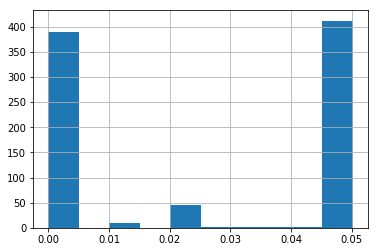

In [117]:
ec_series.hist()

In [118]:
top_officials = officials_df.ix[ec_series.index]
top_officials['ec'] = ec_series
top_officials['person_name'] = person_names.ix[top_officials.index]
top_officials.sort_values(by='ec', ascending=False)

/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,income,savings,real_estate_squares,ec,person_name
198,6.572463e+08,6.574388e+07,87261.30,5.014861e-02,Булавинов Вадим Евгеньевич
120,1.018397e+08,7.322309e+06,31372.40,5.014861e-02,Балыхин Григорий Артёмович
118,5.621293e+08,3.879570e+07,466179.67,5.014861e-02,Аршба Отари Ионович
194,1.455828e+09,1.326527e+07,18081.00,5.014861e-02,Богуславский Ирек Борисович
12,8.065601e+07,9.710037e+05,28119.60,5.006820e-02,Афонин Юрий Вячеславович
269,9.083409e+07,4.457188e+05,33928.00,5.006507e-02,Исаев Андрей Константинович
164,4.527611e+07,3.098322e+06,12000.70,5.006507e-02,Роднина Ирина Константиновна
30,4.115753e+07,2.848843e+06,4055.00,5.006507e-02,Мельников Иван Иванович
87,4.249210e+07,1.226025e+06,10699.20,5.006507e-02,Хованская Галина Петровна
86,4.751392e+07,1.324534e+06,33825.40,5.006507e-02,Тумусов Федот Семенович


In [119]:

c_dict = nx.pagerank_numpy(graph)
c_values = pd.Series(c_dict)
c_values.shape

(861,)

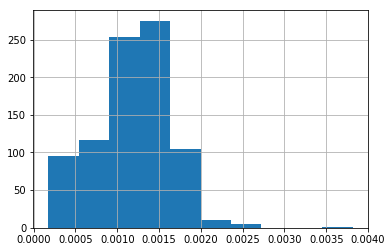

In [120]:
c_values.hist()

In [121]:
top_officials = officials_df.ix[c_values.index]
top_officials['centrality'] = c_values
top_officials['person_name'] = person_names.ix[top_officials.index]
top_officials = top_officials.sort_values(by='centrality', ascending=False)
top_officials

/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,income,savings,real_estate_squares,centrality,person_name
9161,4.884258e+07,127203.62,27955.40,0.003817,Соловьев Сергей Анатольевич
194,1.455828e+09,13265268.00,18081.00,0.002403,Богуславский Ирек Борисович
198,6.572463e+08,65743883.00,87261.30,0.002403,Булавинов Вадим Евгеньевич
118,5.621293e+08,38795699.87,466179.67,0.002403,Аршба Отари Ионович
120,1.018397e+08,7322309.44,31372.40,0.002403,Балыхин Григорий Артёмович
9317,2.673802e+07,0.00,24838.10,0.002375,Погорелов Михаил Алексеевич
1037,5.799668e+07,0.00,22813.40,0.002234,Драгункина Зинаида Федоровна
2478,4.298676e+07,0.00,27694.11,0.002196,Милонов Виталий Валентинович
9184,1.906027e+07,0.00,8781.43,0.002181,Васильев Андрей Валентинович
9185,2.008599e+07,0.00,1703.40,0.002181,Вишневский Борис Лазаревич


/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


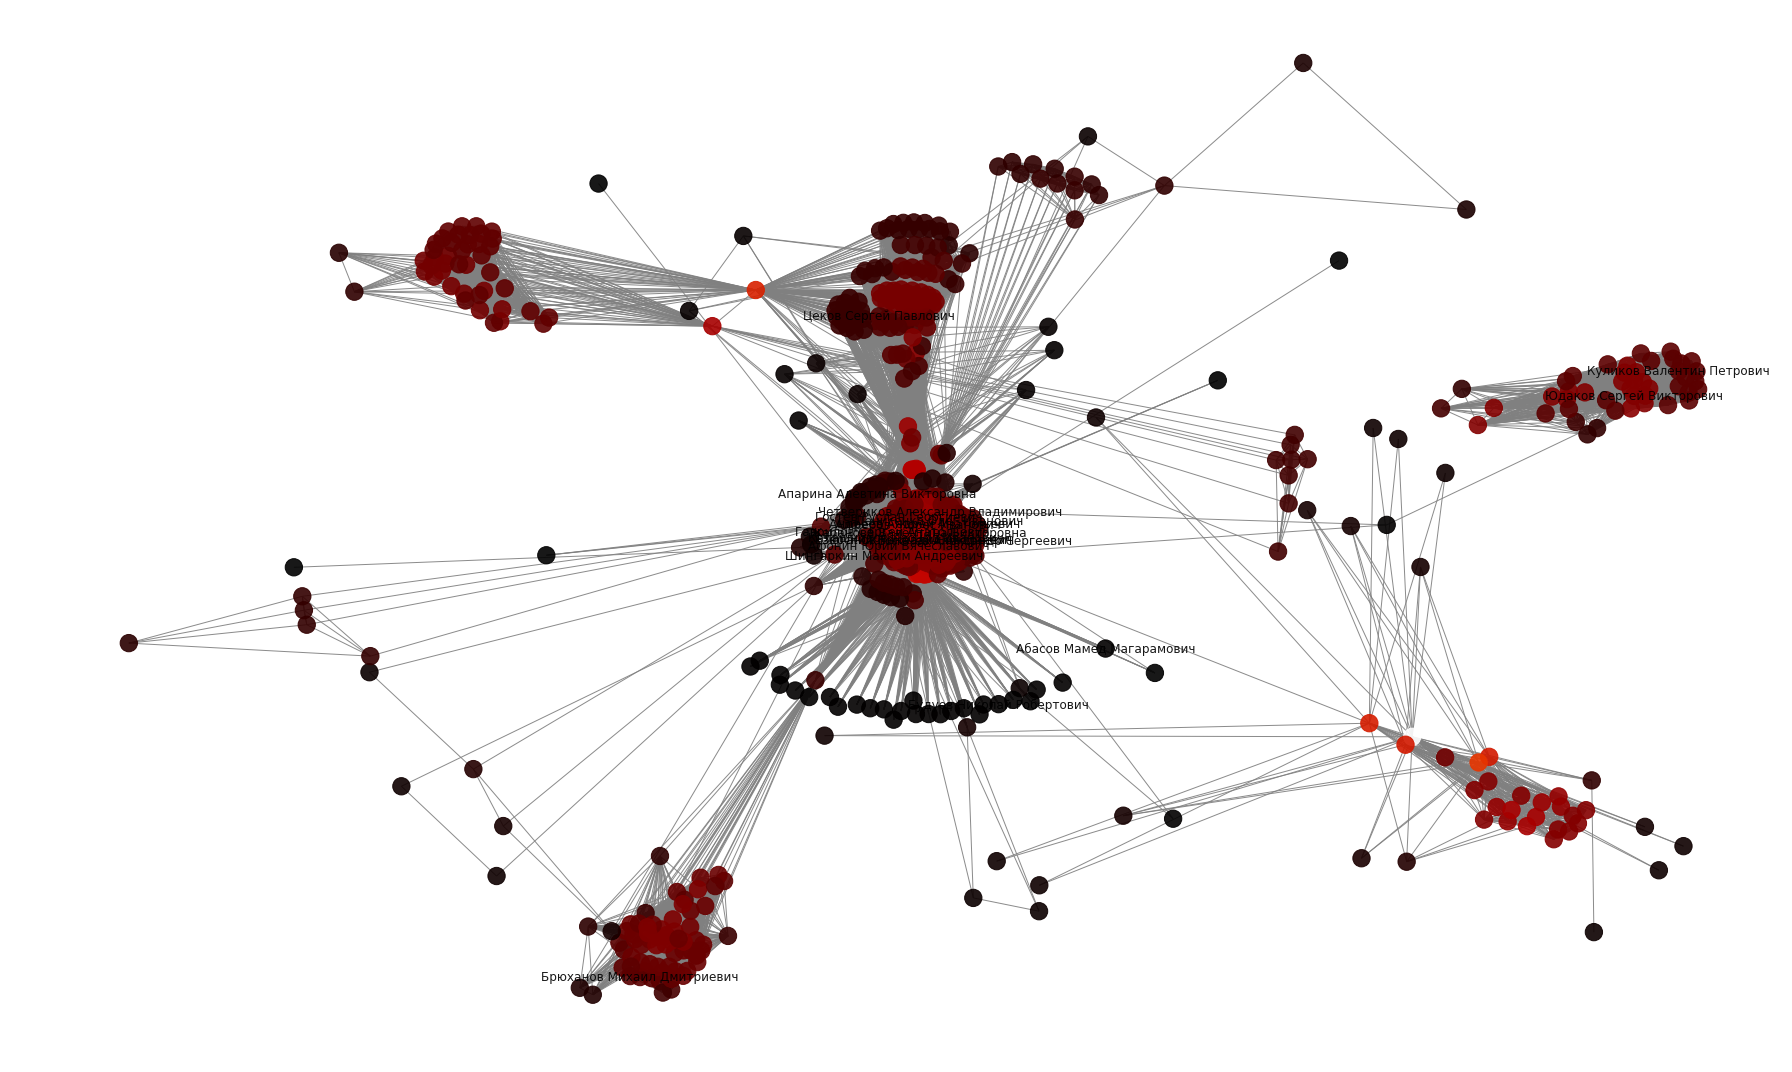

In [174]:
plt.figure(figsize=(25, 15))

pos = nx.spring_layout(graph, k=10/np.sqrt(graph.order()))


to_label = list(top_officials.head(10).index) + random.sample(list(top_officials.index), 10)
labels = top_officials.ix[to_label]['person_name'].to_dict()
colors = c_values
nodesize = c_values*2000

nx.draw_networkx(graph,
                 pos=pos,
                 node_color=colors,
                 nodesize=nodesize,
                 labels=labels,
                 edge_color='grey',
                 alpha=0.9,
                 cmap=plt.cm.gist_heat)
plt.axis('off')
plt.tight_layout()
plt.savefig('pagerank.jpg')
plt.show()

/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


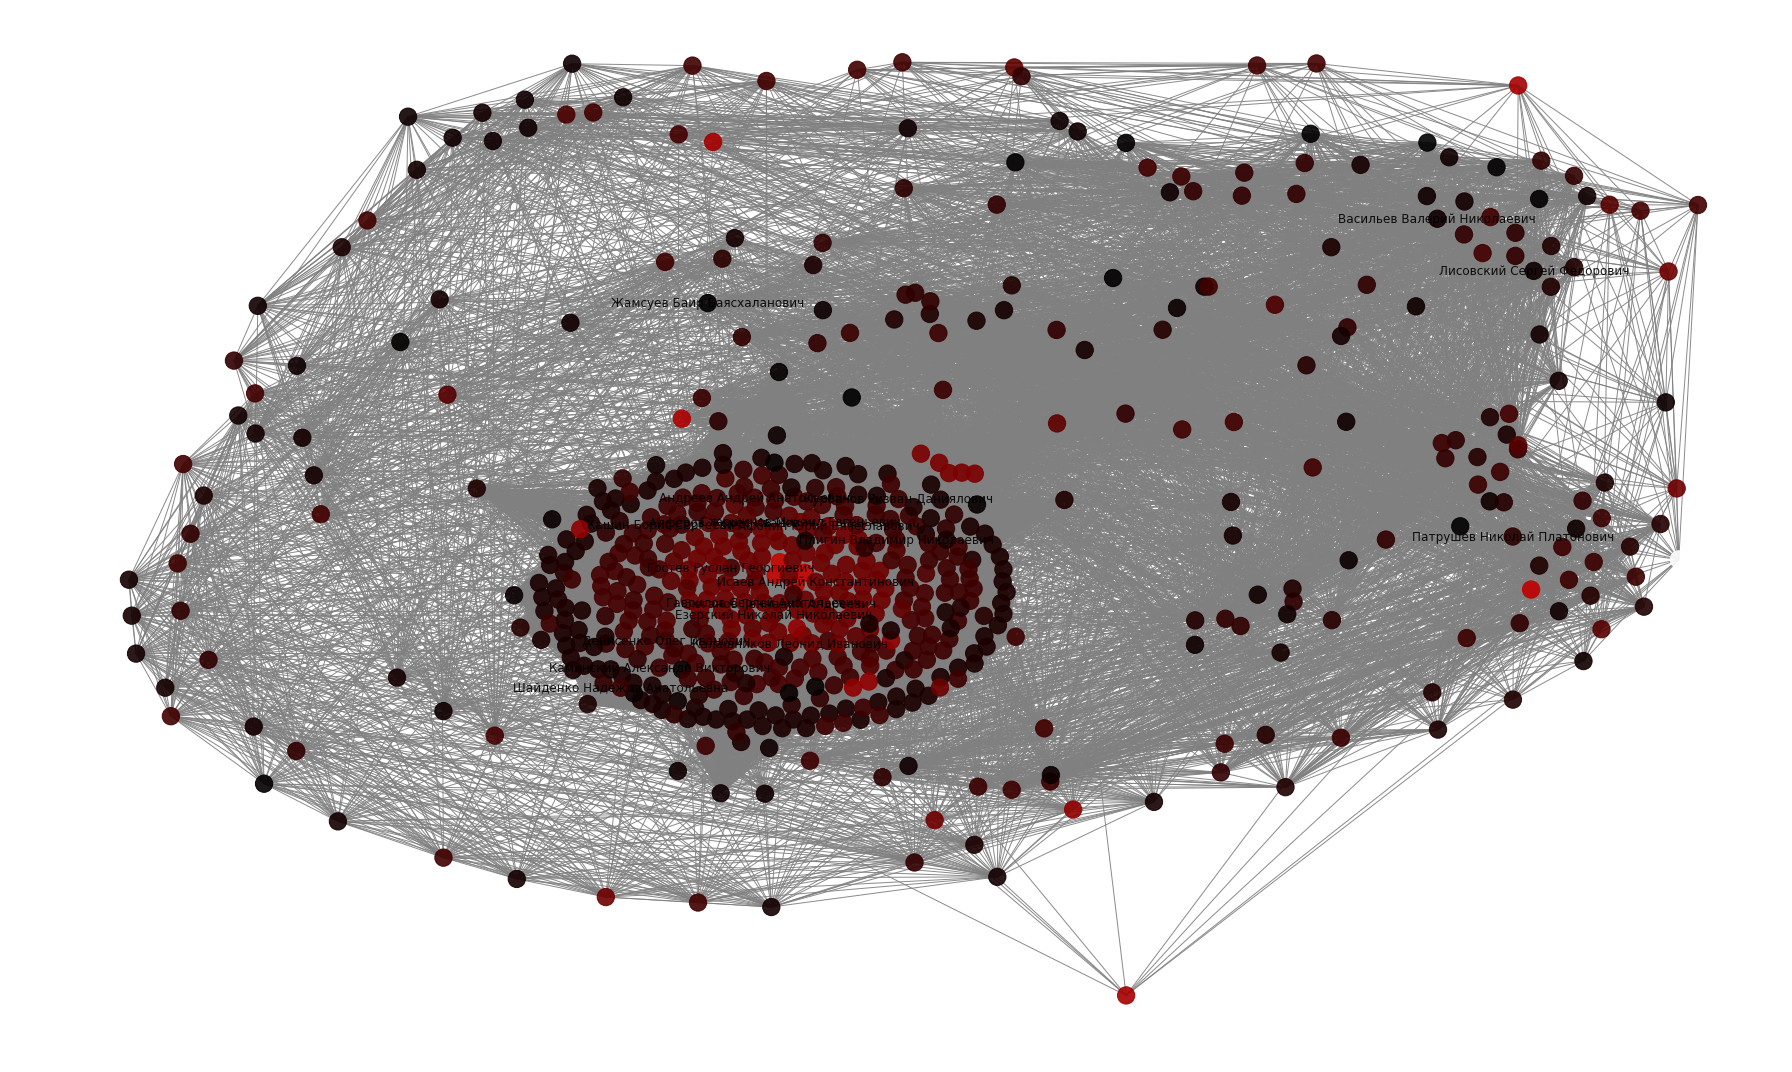

In [173]:
plt.figure(figsize=(25, 15))


draw_only = list(top_officials[top_officials.centrality > top_officials.centrality.quantile(0.25)].index)# list(top_officials.head(200).index)
subgraph = nx.subgraph(graph, draw_only)
colors = c_values.ix[draw_only]
nodesize = c_values.ix[draw_only]/c_values.ix[draw_only].max()*2000

to_label =draw_only[:10] + random.sample(draw_only, 10)
labels = top_officials.ix[to_label]['person_name'].to_dict()

pos = nx.spring_layout(subgraph, k=50/np.sqrt(graph.order()))

nx.draw_networkx(subgraph,
                 pos=pos,
                 node_color=colors,
                 nodesize=nodesize,
                 labels=labels,
                 edge_color='grey',
                 alpha=0.9,
                 cmap=plt.cm.gist_heat)
plt.axis('off')
plt.tight_layout()
plt.savefig('pagerank_cut.jpg')
plt.show()